<a href="https://colab.research.google.com/github/enmwmak/EIE4122/blob/main/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.losses import categorical_crossentropy
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.backend import eager_learning_phase_scope

In [73]:
# Define constants
batch_size = 128
num_classes = 10
epochs = 10
reduced_data = False
n_feamap = 16

In [39]:
def load_data():
    img_rows, img_cols = 28, 28

    # Load data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    # Use 2500 training samples only
    if reduced_data is True:
        idx = np.random.randint(0, x_train.shape[0], 2500)
        x_train = x_train[idx]
        y_train = y_train[idx]

    # Scale the data to [0,1]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255.0
    x_test /= 255.0

    return x_train, y_train, x_test, y_test, input_shape

In [42]:
def define_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(n_feamap, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(n_feamap, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(n_feamap, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    for i in range(0,3):
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

In [36]:
def plot_image(data):
    x = data[4].reshape(1, 28, 28, 1)
    plt.figure()
    plt.imshow(x[0, :, :, 0])
    plt.show(block=False)

In [70]:
def main():
    
    x_train, y_train, x_test, y_test, input_shape = load_data()
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # Convert class vectors to binary class matrices
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # Define CNN
    model = define_cnn_model(input_shape)

    # Compile the CNN
    model.compile(loss=categorical_crossentropy, 
                  optimizer='rmsprop', metrics=['accuracy'])

    # Train the CNN
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
              shuffle=False, validation_data=(x_test, y_test))

    # Save the model
    model.save('models/mnist_cnn1.h5')

    # Evalute the CNN
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy: %.2f%%' % (score[1]*100))

    # Plot image
    plot_image(x_test)    

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
______________________________________________

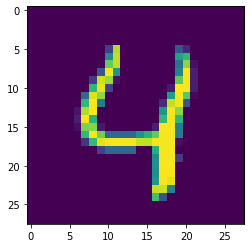

In [74]:
main()

In [47]:
!ls models

mnist_cnn1.h5
